In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
train_df=pd.read_csv("/content/gdrive/MyDrive/data_augmentation_methods_l3cube/data/mahasent_data/mahasent_train_new_part1.csv")
valid_df=pd.read_csv("/content/gdrive/MyDrive/BE Project Work/data/tweets-valid.csv")
test_df=pd.read_csv("/content/gdrive/MyDrive/BE Project Work/data/tweets-test.csv")

In [ ]:
train_df

,tweet,label
0,ज्येष्ठ पत्रकार अनंत दीक्षित यांच्या निधनाचे...,0
1,सर्वोच्च न्यायालयाचे निर्देश डावलून पुणे पोल...,0
2,उद्धव ठाकरेंनी भाजपासोबत युती करून शिवसैनिका...,0
3,आपला समाज खूप मोठा आहे. त्यात अनेक घटक अंतर्...,1
4,बलात्काराचा बदला बलात्काराने घेतला पाहिजे हे म...,0
...,...,...
6051,काँग्रेस नेते @Harshvardhanji यांनी लिहिलेल्...,2
6052,"आपल्या अभंग, विचारवाणीतून\nव्यावहारिक सत्य म...",1
6053,त्याचबरोबर काजू व्यावसायिकांची मागील कालावधी...,1
6054,सरकारने कर्जमाफी योजना लागू करुन सुमारे २ वर...,0


In [ ]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
train_df['label'].value_counts()

0    2019
1    2019
2    2018
Name: label, dtype: int64

In [ ]:
!pip -q install simpletransformers

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
model_args = ClassificationArgs()
model = ClassificationModel(
    'bert',
    'l3cube-pune/marathi-bert-v2',
    num_labels=3,
    args=model_args,
    tokenizer_type="bert",
    tokenizer_name='l3cube-pune/marathi-bert-v2'
)

# from simpletransformers.classification import (
#     MultiLabelClassificationModel, MultiLabelClassificationArgs
# )
# model_args = MultiLabelClassificationArgs(num_train_epochs=5) 
# model = MultiLabelClassificationModel(
#     "roberta",
#     "roberta-base",
#     num_labels=3,
#     args=model_args,
# )

# model_args = ClassificationArgs(num_train_epochs=1)

# # Create a ClassificationModel
# model = ClassificationModel(
#     'bert',
#     'bert-base-cased',
#     num_labels=3,
#     args=model_args
# ) 


Some weights of the model checkpoint at l3cube-pune/marathi-bert-v2 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/marat

In [ ]:
num_labels = len(train_df['label'].unique())
keys = list(train_df['label'].unique())  # original dataset labels (-1, 0, 1)
values = list(range(0, num_labels))  # new labels (0, 1, 2)
label_dict = dict(zip(keys,values))  # map old labels to new labels
train_df['label'] = train_df['label'].apply(lambda x:label_dict[x])
valid_df['label'] = valid_df['label'].apply(lambda x:label_dict[x])
test_df['label'] = test_df['label'].apply(lambda x:label_dict[x])

In [ ]:
label_dict

{0: 0, 1: 1, 2: 2}

In [ ]:
short_train_df=train_df.iloc[:,:]
short_valid_df=valid_df.iloc[:,:]
short_test_df=test_df.iloc[:,:]

In [ ]:
train_df.shape[0]

6056

In [ ]:
train_df

,tweet,label
0,ज्येष्ठ पत्रकार अनंत दीक्षित यांच्या निधनाचे...,0
1,सर्वोच्च न्यायालयाचे निर्देश डावलून पुणे पोल...,0
2,उद्धव ठाकरेंनी भाजपासोबत युती करून शिवसैनिका...,0
3,आपला समाज खूप मोठा आहे. त्यात अनेक घटक अंतर्...,1
4,बलात्काराचा बदला बलात्काराने घेतला पाहिजे हे म...,0
...,...,...
6051,काँग्रेस नेते @Harshvardhanji यांनी लिहिलेल्...,2
6052,"आपल्या अभंग, विचारवाणीतून\nव्यावहारिक सत्य म...",1
6053,त्याचबरोबर काजू व्यावसायिकांची मागील कालावधी...,1
6054,सरकारने कर्जमाफी योजना लागू करुन सुमारे २ वर...,0


In [ ]:
train_df.label.value_counts()

0    2019
1    2019
2    2018
Name: label, dtype: int64

In [ ]:
train_loss=[]
valid_loss=[]
for i in range(0,10):
    !rm -rf outputs
    print("-"*130)
    print("epoch ",i+1,"/","10")
    model.train_model(short_train_df,eval_data=short_valid_df,acc=sklearn.metrics.classification_report)
    result, model_outputs, preds_list = model.eval_model(short_train_df,acc=sklearn.metrics.classification_report)
    train_loss.append(result["eval_loss"])
    result, model_outputs, preds_list = model.eval_model(short_valid_df,acc=sklearn.metrics.classification_report)
    valid_loss.append(result["eval_loss"])

----------------------------------------------------------------------------------------------------------------------------------
epoch  1 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  2 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  3 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  4 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  5 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  6 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  7 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  8 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  9 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------
epoch  10 / 10


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

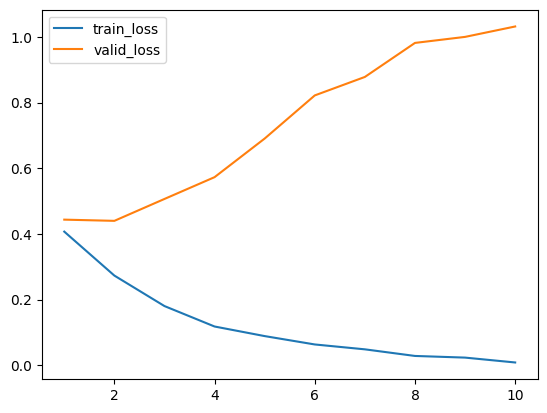

In [ ]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [i for i in range(1,11)]
  
# plot lines
plt.plot(x,train_loss, label = "train_loss")
plt.plot(x,valid_loss, label = "valid_loss")
plt.legend()
plt.show()

In [ ]:
print("-"*60,"TRAIN RESULTS","-"*60)
result, model_outputs, preds_list = model.eval_model(short_train_df,acc=sklearn.metrics.classification_report)
for j in result.values():
    print(j)

------------------------------------------------------------ TRAIN RESULTS ------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6056 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/757 [00:00<?, ?it/s]

0.9972757145467802
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2019
         1.0       1.00      1.00      1.00      2019
         2.0       1.00      1.00      1.00      2018

    accuracy                           1.00      6056
   macro avg       1.00      1.00      1.00      6056
weighted avg       1.00      1.00      1.00      6056

0.008152040339209129


In [ ]:
print("-"*60,"VALID RESULTS","-"*60)
result, model_outputs, preds_list = model.eval_model(short_valid_df,acc=sklearn.metrics.classification_report)
for j in result.values():
    print(j)

------------------------------------------------------------ VALID RESULTS ------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/188 [00:00<?, ?it/s]

0.7775460290358933
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       500
         1.0       0.84      0.86      0.85       500
         2.0       0.83      0.77      0.80       500

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500

1.0320301009936537


In [ ]:
print("-"*60,"TEST RESULTS","-"*60)
result, model_outputs, preds_list = model.eval_model(short_test_df,acc=sklearn.metrics.classification_report)
for j in result.values():
    print(j)

------------------------------------------------------------ TEST RESULTS ------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2250 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/282 [00:00<?, ?it/s]

0.7435838806911169
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       750
         1.0       0.82      0.83      0.83       750
         2.0       0.80      0.76      0.78       750

    accuracy                           0.83      2250
   macro avg       0.83      0.83      0.83      2250
weighted avg       0.83      0.83      0.83      2250

1.1919129541579714


## RESULTS
### 'l3cube-pune/marathi-bert-v2' finetuned on MahaSent Part 1  
### Train dataset accuracy : 100%
### Valid dataset accuracy : 85%
### Test dataset accuracy : 83%

In [ ]:
# save model 

model_name = 'marathi_bert_v2_finetuned_mahasent_part1'
path = '/content/gdrive/MyDrive/data_augmentation_methods_l3cube/models/'
model_path = path + model_name
model_path 

'/content/gdrive/MyDrive/data_augmentation_methods_l3cube/models/marathi_bert_v2_finetuned_mahasent_part1'

In [ ]:
model.model.save_pretrained(model_path)
model.tokenizer.save_pretrained(model_path)
model.config.save_pretrained(model_path + '/')

In [ ]:
model = ClassificationModel('bert', model_path)

# Making some predictions using this new model

In [ ]:
test_df

,tweet,label
0,#BetiBachao चा फक्त नारा देऊन उपयोग नाही. महि...,1
1,पेट्रोल आणि डिझेलवर एक रूपया अधिभार लावल्यान...,0
2,"लूट झूट का राज भागावो, \nरोजगार और विकास ला...",1
3,महाराष्ट्र विकास आघाडी सरकारच्या मंत्रिमंडळ ...,1
4,पिंपरीत अ‍ॅथलेटिक्स आणि विविध क्षेत्रांतल्या...,1
...,...,...
2245,"जनसामान्यांचे प्रतिनिधी, संविधानाचे जाणकार, ...",1
2246,अक्षय्य तृतियेच्या हार्दिक शुभेच्छा...\n\n#A...,1
2247,अभाव दिसतो. कोरोनाने दिलेल्या संधीचा उपोयोग ...,2
2248,मोदींच्या कामाला जनतेचा कौल! \n‘सकाळ‘ मध्ये ...,1


In [ ]:
test_examples_list = test_df['tweet'].to_list()

In [ ]:
len(test_examples_list)

2250

In [ ]:
print(test_examples_list)

[" #BetiBachao चा फक्त नारा देऊन उपयोग नाही. महिला अत्याचाराच्या आरोपींना वेळीच कठोर शासनही झालं पाहिजे. पण 'गहुंजे' खटल्यात अक्षम्य दिरंगाई झाली आहे. महिला सुरक्षेबाबत तत्परतेचे दावे फोल ठरले आहेत. 'गहुंजे'च्या आरोपींना फाशी होणेबाबत सरकारने तातडीने कायदेशीर पावले उचलली पाहिजे. pic.twitter.com/x6GoZjM6Tk\n", '  पेट्रोल आणि डिझेलवर एक रूपया अधिभार लावल्याने शेतकर्\u200dयांना ट्रॅक्टर, शेती मालवाहतूक यासाठी आता आणखी भार पडणार आहे. शेतकर्\u200dयांसाठी एकही नवीन घोषणा, योजना या अर्थसंकल्पात नाही. शेतकरी, महिला, युवा अशा सर्व वर्गांना निराश करणारा हा अर्थसंकल्प आहे.\n#Maharashtra #Budget2020 pic.twitter.com/thFvePK6Es\n', '  लूट झूट का राज भागावो,  \nरोजगार और विकास लावो..!\n\nहा नारा बुलंद करत निघालेल्या युवक काँग्रेसच्या युवा क्रांती यात्रेचे देवगाव फाटा (जि. वर्धा) येथे युवक काँग्रेसच्या कार्यकर्त्यांनी दिमाखात स्वागत केले. @rssurjewala @Allavaru pic.twitter.com/Dr0K74Y7jK\n', '  महाराष्ट्र विकास आघाडी सरकारच्या मंत्रिमंडळ विस्तारासाठी विधानमंडळात संपन्न झालेल्या सोहळ्यात मंत्रिपदाची शप

In [ ]:
# Make predictions on the validation data
predictions, raw_outputs = model.predict(test_examples_list)


  0%|          | 0/2250 [00:00<?, ?it/s]

  0%|          | 0/282 [00:00<?, ?it/s]

In [ ]:
predictions

array([0, 0, 1, ..., 2, 1, 1])

In [ ]:
len(predictions)

2250

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(test_df['label'], predictions)

# Calculate F1 score
f1 = f1_score(test_df['label'], predictions, average='weighted')


In [ ]:
accuracy

0.8288888888888889

In [ ]:
f1

0.828181873965211

In [ ]:
for i in range(0, 10):
  print(predictions[i], test_df['label'][i]) 


0 1
0 0
1 1
1 1
1 1
2 2
1 1
2 2
1 2
0 0
